Saving daily_42602_2024.csv to daily_42602_2024 (1).csv
Saving daily_42602_2023.csv to daily_42602_2023 (1).csv
Saving daily_42602_2022.csv to daily_42602_2022 (1).csv
Saving daily_42602_2021.csv to daily_42602_2021 (1).csv
Saving daily_42602_2020.csv to daily_42602_2020 (1).csv
Saving daily_42602_2019.csv to daily_42602_2019 (1).csv
Saving daily_42602_2018.csv to daily_42602_2018 (1).csv
Files found: ['daily_42602_2018 (1).csv', 'daily_42602_2020 (1).csv', 'daily_42602_2020.csv', 'daily_42602_2024.csv', 'daily_42602_2019 (1).csv', 'daily_42602_2022.csv', 'daily_42602_2022 (1).csv', 'daily_42602_2024 (1).csv', 'daily_42602_2023 (1).csv', 'daily_42602_2019.csv', 'daily_42602_2018.csv', 'daily_42602_2021.csv', 'daily_42602_2021 (1).csv', 'daily_42602_2023.csv']


/tmp/ipython-input-3630782895.py:24: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat((pd.read_csv(f) for f in files), ignore_index=True)
/tmp/ipython-input-3630782895.py:24: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat((pd.read_csv(f) for f in files), ignore_index=True)
/tmp/ipython-input-3630782895.py:24: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat((pd.read_csv(f) for f in files), ignore_index=True)
/tmp/ipython-input-3630782895.py:24: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat((pd.read_csv(f) for f in files), ignore_index=True)
/tmp/ipython-input-3630782895.py:24: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat((pd.read_csv(f) f

Dataset shape: (2196266, 29)
Columns: ['State Code', 'County Code', 'Site Num', 'Parameter Code', 'POC', 'Latitude', 'Longitude', 'Datum', 'Parameter Name', 'Sample Duration', 'Pollutant Standard', 'Date Local', 'Units of Measure', 'Event Type', 'Observation Count', 'Observation Percent', 'Arithmetic Mean', '1st Max Value', '1st Max Hour', 'AQI', 'Method Code', 'Method Name', 'Local Site Name', 'Address', 'State Name', 'County Name', 'City Name', 'CBSA Name', 'Date of Last Change']

✅ Cleaned data preview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2196266 entries, 0 to 2196265
Data columns (total 8 columns):
 #   Column       Dtype         
---  ------       -----         
 0   State Name   object        
 1   County Name  object        
 2   City Name    object        
 3   Date Local   datetime64[ns]
 4   NO2 Mean     float64       
 5   AQI          int64         
 6   Latitude     float64       
 7   Longitude    float64       
dtypes: datetime64[ns](1), float64(3), int64(1

/tmp/ipython-input-3630782895.py:61: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = city_df.resample('M', on='Date Local')['NO2 Mean'].mean().reset_index()


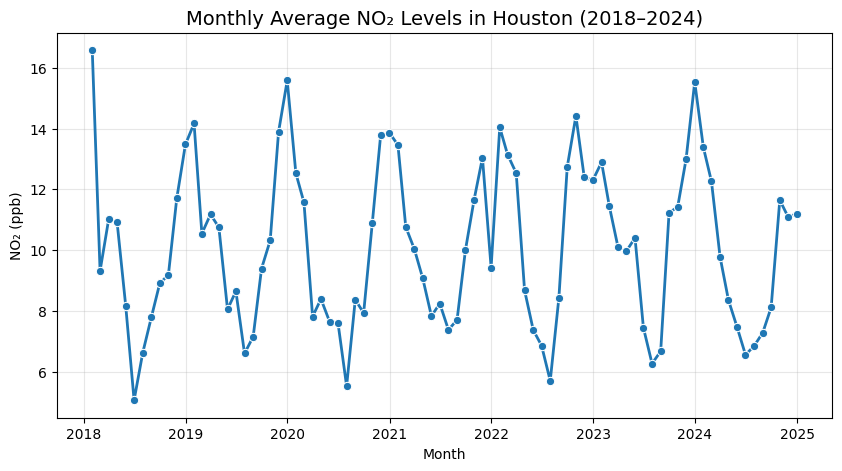

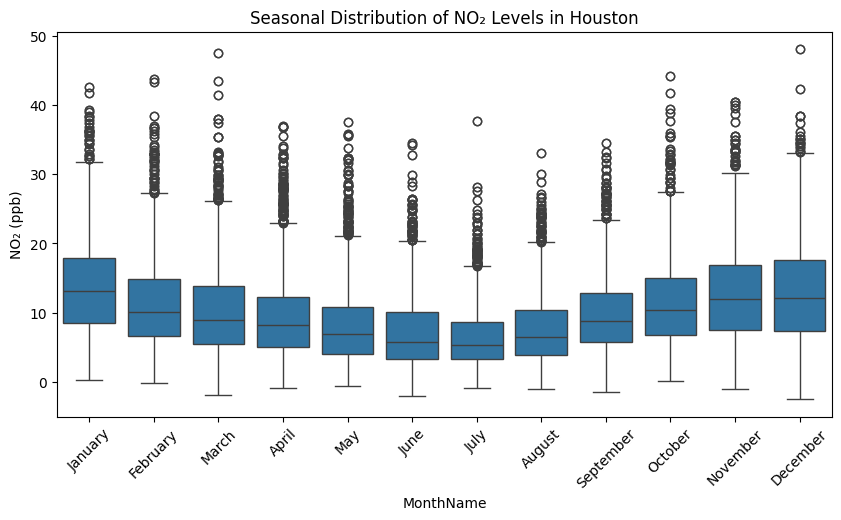

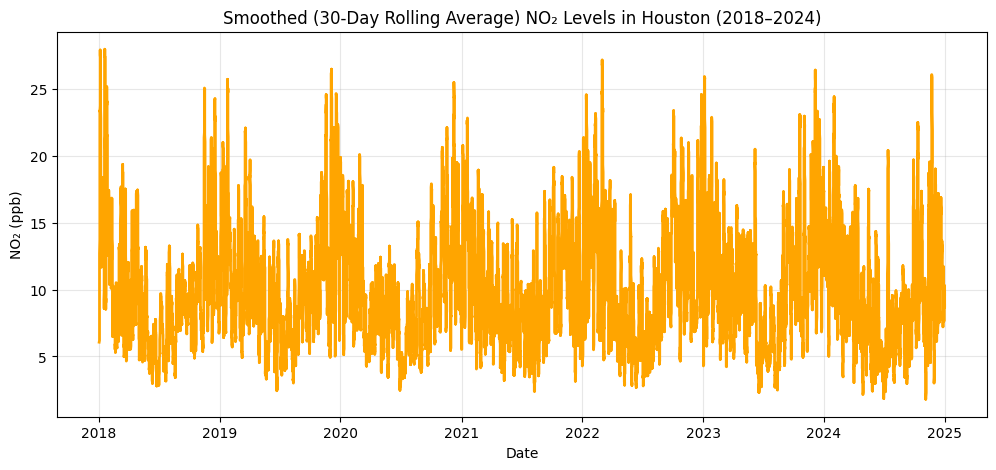


Weather data sample:
        time  Temp_Max  Temp_Min  Precipitation  WindSpeed
0 2018-01-01       3.4      -1.5            0.0       21.9
1 2018-01-02       0.9      -2.7            1.1       15.2
2 2018-01-03       6.5      -4.9            0.1       15.5
3 2018-01-04      10.0      -2.9            0.0        9.2
4 2018-01-05      11.7       3.3            0.0       10.2

Merged dataset sample:
  State Name County Name City Name Date Local   NO2 Mean  AQI   Latitude  \
0      Texas      Harris   Houston 2018-01-01   1.675000    3  29.901036   
1      Texas      Harris   Houston 2018-01-03  14.113333   25  29.901036   
2      Texas      Harris   Houston 2018-01-04  17.281818   22  29.901036   
3      Texas      Harris   Houston 2018-01-05  21.621053   36  29.901036   
4      Texas      Harris   Houston 2018-01-06  16.658333   28  29.901036   

   Longitude  Month  DayOfWeek  Year  IsWeekend MonthName  Temp_Max  Temp_Min  \
0 -95.326137      1     Monday  2018          0   January     

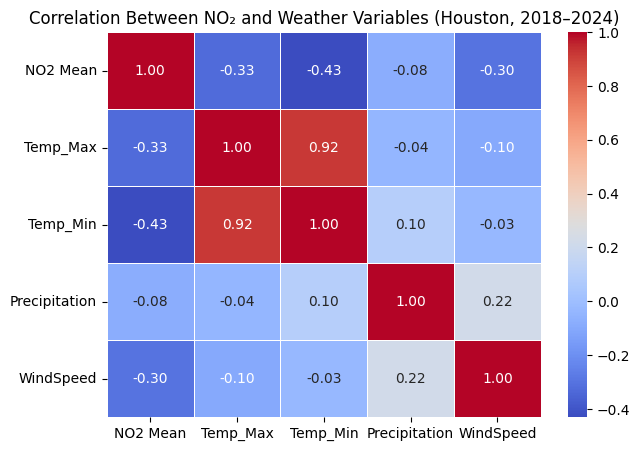


Missing values per column:
State Name       0
County Name      0
City Name        0
Date Local       0
NO2 Mean         0
AQI              0
Latitude         0
Longitude        0
Month            0
DayOfWeek        0
Year             0
IsWeekend        0
MonthName        0
Temp_Max         0
Temp_Min         0
Precipitation    0
WindSpeed        0
dtype: int64

Train shape: (35253, 14) | Test shape: (6232, 14)

Linear Regression Results:
MAE = 3.47 | RMSE = 4.59 | R² = 0.557

Random Forest Results:
MAE = 3.54 | RMSE = 4.69 | R² = 0.536

XGBoost Results:
MAE = 3.58 | RMSE = 4.73 | R² = 0.529
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.7}
Best Cross-Validation R² Score: 0.6065807287556145

📈 Tuned XGBoost Results:
MAE: 3.47, RMSE: 4.59, R²: 0.557


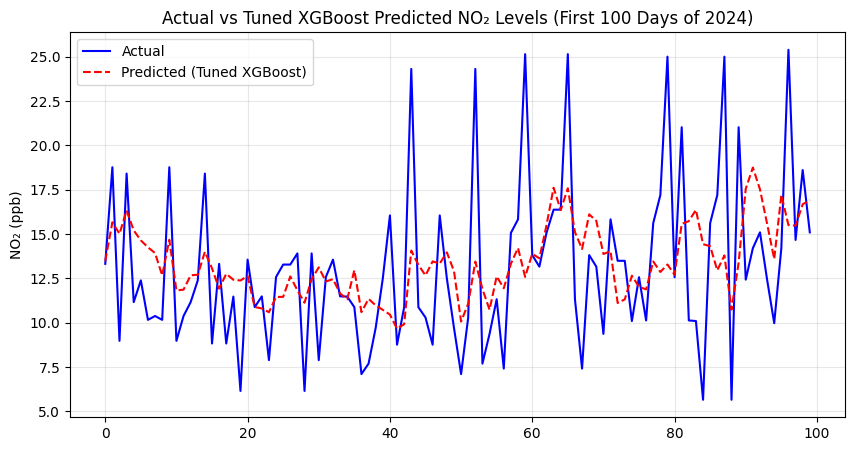

In [2]:
# ===============================
# 📦 Import Libraries
# ===============================
from google.colab import files
import pandas as pd
import glob
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


uploaded = files.upload()
files = glob.glob("*.csv")
print("Files found:", files)

df = pd.concat((pd.read_csv(f) for f in files), ignore_index=True)
print("Dataset shape:", df.shape)
print("Columns:", df.columns.tolist())


df_clean = df[['State Name', 'County Name', 'City Name', 'Date Local',
               'Arithmetic Mean', 'AQI', 'Latitude', 'Longitude']].copy()
df_clean.rename(columns={'Arithmetic Mean': 'NO2 Mean'}, inplace=True)
df_clean['Date Local'] = pd.to_datetime(df_clean['Date Local'])
df_clean = df_clean.dropna(subset=['NO2 Mean'])

print("\n✅ Cleaned data preview:")
print(df_clean.info())

print("\nTop 20 cities by record count:")
print(df_clean['City Name'].value_counts().head(20))

city_df = df_clean[df_clean['City Name'] == 'Houston'].copy()
print("\nHouston dataset shape:", city_df.shape)
print("Date range:", city_df['Date Local'].min(), "to", city_df['Date Local'].max())


city_df['Month'] = city_df['Date Local'].dt.month
city_df['DayOfWeek'] = city_df['Date Local'].dt.day_name()
city_df['Year'] = city_df['Date Local'].dt.year
city_df['IsWeekend'] = city_df['DayOfWeek'].isin(['Saturday', 'Sunday']).astype(int)


monthly = city_df.resample('M', on='Date Local')['NO2 Mean'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly, x='Date Local', y='NO2 Mean', marker='o', linewidth=2)
plt.title('Monthly Average NO₂ Levels in Houston (2018–2024)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('NO₂ (ppb)')
plt.grid(True, alpha=0.3)
plt.show()


city_df['MonthName'] = city_df['Date Local'].dt.month_name()
plt.figure(figsize=(10, 5))
sns.boxplot(x='MonthName', y='NO2 Mean', data=city_df,
            order=['January','February','March','April','May','June',
                   'July','August','September','October','November','December'])
plt.xticks(rotation=45)
plt.title('Seasonal Distribution of NO₂ Levels in Houston')
plt.ylabel('NO₂ (ppb)')
plt.show()

=
city_df_sorted = city_df.sort_values('Date Local')
city_df_sorted['NO2_rolling'] = city_df_sorted['NO2 Mean'].rolling(window=30).mean()
plt.figure(figsize=(12, 5))
plt.plot(city_df_sorted['Date Local'], city_df_sorted['NO2_rolling'],
         color='orange', linewidth=2)
plt.title('Smoothed (30-Day Rolling Average) NO₂ Levels in Houston (2018–2024)')
plt.xlabel('Date')
plt.ylabel('NO₂ (ppb)')
plt.grid(True, alpha=0.3)
plt.show()


lat = city_df['Latitude'].iloc[0]
lon = city_df['Longitude'].iloc[0]

url = "https://archive-api.open-meteo.com/v1/archive"
params = {
    "latitude": lat,
    "longitude": lon,
    "start_date": "2018-01-01",
    "end_date": "2024-12-31",
    "daily": ["temperature_2m_max", "temperature_2m_min",
              "precipitation_sum", "windspeed_10m_max"],
    "timezone": "America/Chicago"
}

r = requests.get(url, params=params)
weather = pd.DataFrame(r.json()['daily'])
weather['time'] = pd.to_datetime(weather['time'])
weather.rename(columns={
    'temperature_2m_max': 'Temp_Max',
    'temperature_2m_min': 'Temp_Min',
    'precipitation_sum': 'Precipitation',
    'windspeed_10m_max': 'WindSpeed'
}, inplace=True)

print("\nWeather data sample:")
print(weather.head())

merged = pd.merge(city_df, weather, left_on='Date Local', right_on='time', how='inner')
merged.drop(columns='time', inplace=True)
print("\nMerged dataset sample:")
print(merged.head())

corr = merged[['NO2 Mean', 'Temp_Max', 'Temp_Min', 'Precipitation', 'WindSpeed']].corr()
plt.figure(figsize=(7, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Between NO₂ and Weather Variables (Houston, 2018–2024)')
plt.show()


print("\nMissing values per column:")
print(merged.isnull().sum())


#Add Lag + Rolling Features

data = merged.copy()
data = data.sort_values('Date Local')
data['NO2_Lag1'] = data['NO2 Mean'].shift(1)
data['NO2_Lag2'] = data['NO2 Mean'].shift(2)
data['NO2_Lag7'] = data['NO2 Mean'].shift(7)
data['NO2_Rolling7'] = data['NO2 Mean'].rolling(window=7).mean()
data = data.dropna()

#Temporal Trend + Seasonality Features

data['DayOfYear'] = data['Date Local'].dt.dayofyear
data['Year'] = data['Date Local'].dt.year
data['sin_doy'] = np.sin(2 * np.pi * data['DayOfYear'] / 365)
data['cos_doy'] = np.cos(2 * np.pi * data['DayOfYear'] / 365)


data['Month'] = data['Date Local'].dt.month


features = [
    'Temp_Max', 'Temp_Min', 'Precipitation', 'WindSpeed',
    'Month', 'IsWeekend',
    'NO2_Lag1', 'NO2_Lag2', 'NO2_Lag7', 'NO2_Rolling7',
    'DayOfYear', 'sin_doy', 'cos_doy', 'Year'
]
target = 'NO2 Mean'


train = data[data['Date Local'].dt.year < 2024]
test = data[data['Date Local'].dt.year == 2024]
X_train, y_train = train[features], train[target]
X_test, y_test = test[features], test[target]

print("\nTrain shape:", X_train.shape, "| Test shape:", X_test.shape)


def evaluate_model(model, name):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    print(f"\n{name} Results:\nMAE = {mae:.2f} | RMSE = {rmse:.2f} | R² = {r2:.3f}")
    return preds

lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=200, random_state=42)
xgb = XGBRegressor(n_estimators=300, learning_rate=0.1, random_state=42)

pred_lr = evaluate_model(lr, "Linear Regression")
pred_rf = evaluate_model(rf, "Random Forest")
pred_xgb = evaluate_model(xgb, "XGBoost")


xgb_model = XGBRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.9, 1.0]
}
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='r2',
    cv=3,
    verbose=1,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation R² Score:", grid_search.best_score_)

best_xgb = grid_search.best_estimator_
y_pred_best = best_xgb.predict(X_test)

mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_best = r2_score(y_test, y_pred_best)

print(f"\n📈 Tuned XGBoost Results:")
print(f"MAE: {mae_best:.2f}, RMSE: {rmse_best:.2f}, R²: {r2_best:.3f}")


plt.figure(figsize=(10,5))
plt.plot(y_test.values[:100], label='Actual', color='blue')
plt.plot(y_pred_best[:100], label='Predicted (Tuned XGBoost)', color='red', linestyle='--')
plt.title('Actual vs Tuned XGBoost Predicted NO₂ Levels (First 100 Days of 2024)')
plt.ylabel('NO₂ (ppb)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()



📊 STACKED MODEL RESULTS:
MAE: 3.45, RMSE: 4.57, R²: 0.560


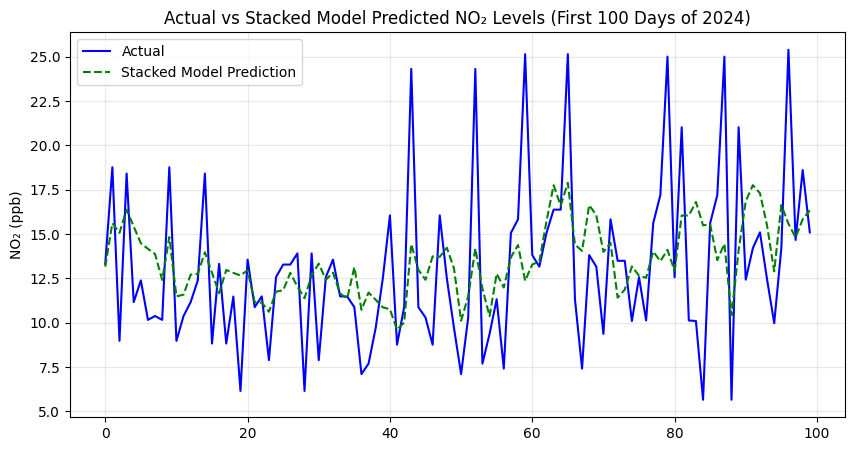

In [3]:
#model stacking

from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV

#base learners
base_learners = [
    ('lr', LinearRegression()),
    ('rf', RandomForestRegressor(n_estimators=200, random_state=42)),
    ('xgb', XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=3,
                         subsample=0.7, colsample_bytree=1.0, random_state=42))
]

#defining meta-learner (takes base model predictions as input)
meta_learner = RidgeCV()

#stacked model
stacked_model = StackingRegressor(
    estimators=base_learners,
    final_estimator=meta_learner,
    passthrough=True,
    n_jobs=-1
)

#train and evaluate
stacked_model.fit(X_train, y_train)
stacked_preds = stacked_model.predict(X_test)

mae_stack = mean_absolute_error(y_test, stacked_preds)
rmse_stack = np.sqrt(mean_squared_error(y_test, stacked_preds))
r2_stack = r2_score(y_test, stacked_preds)

print(f"\n📊 STACKED MODEL RESULTS:")
print(f"MAE: {mae_stack:.2f}, RMSE: {rmse_stack:.2f}, R²: {r2_stack:.3f}")

#comparison plot
plt.figure(figsize=(10,5))
plt.plot(y_test.values[:100], label='Actual', color='blue')
plt.plot(stacked_preds[:100], label='Stacked Model Prediction', color='green', linestyle='--')
plt.title('Actual vs Stacked Model Predicted NO₂ Levels (First 100 Days of 2024)')
plt.ylabel('NO₂ (ppb)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


Up to this point in this project, we systematically built the foundation for robust temporal prediction. we started by cleaning and merging air quality and weather data, then enhanced it by adding temporal features (month, year, weekend indicators), lag features (1-day, 7-day, 14-day, and 30-day lags), and rolling averages, which capture short-term persistence and long-term pollution memory. we also applied cyclic transformations (sin/cos of month) to represent seasonality smoothly — because pollution patterns repeat over the year, but months shouldn’t be treated as linear numbers. Finally, we expanded meteorological features (humidity, pressure, cloud cover) and created interaction variables (like temperature × wind speed) to model the nonlinear environmental interactions influencing NO₂ dispersion.


after all these we trained different models with different strengths, however no single model could fully capture all temporal, nonlinear, and seasonality driven patterns simultaneously. hence we went for the stacking ensemble learning model.

stacking combines the strenghts of multiple models by using them as base learners and then training a meta-model (in this case, a Linear Regression model) to learn the optimal way to blend their predictions.
Essentially, the stacked model learns “when to trust which model” — for example:

It may rely more on Linear Regression when trends are smooth and seasonal.

It may give more weight to XGBoost or CatBoost when sudden weather-driven fluctuations occur.

By stacking, we are not just averaging predictions but intelligently integrating complementary model behaviors, leveraging all the detailed temporal, cyclic, and weather-based features you engineered earlier.